# Stack Overflow Survey Analysis

Stack Overflow is likely the largest and most trusted online community of professional developers in the world today. I'm a Software Engineer myself and I can't think of a week in the past year in which I didn't check it at least one day to find an answer to a particular problem I faced. Whenever I run a Google Search for a problem, I usually jump at the first stack overflow link provided and chances are I won't have to go anywhere else.

Since 2011, Stack Overflow has been running an Annual Developer survey that examines all aspects of the developer experience, from career satisfaction and job search to education and opinions on open source software. I learned about it recently, and it immediately sparked my interest as it offers an opportunity to zoom out and learn about current trends in the field I'm a part of.

Stack Overflow already provides an in-depth analysis of the responses. I examined the [2019 analysis](https://insights.stackoverflow.com/survey/2019) and I thought it was really good, but one think I would like to have seen is a breakdown of the responses at a continent level. They do provide response counts at this level in the Methodology section, but I didn't find anything else past that. Additionally, I didn't get much of a sense about how the results compare to previous years.

This motivated me to run an analysis in which I zoom out to the continents level and look at the response breakdown for the past 3 years. My goal is to get a sense of how uniform (or diverse) are the responses across the world when looked from certain dimensions that I personally find relevant. Additionally, by looking at past years we can potentially get an idea of some trends in the field.

In particular for responses from the past 3 years, and based on the kind of responses I found interesting in the [2019 analysis](https://insights.stackoverflow.com/survey/2019), I decided to look into the following metrics at a continent level:

- Number of responses
- Gender breakdown
- Average age at which developers start coding
- Top 3 most popular programming languages
- Top 3 roles with the highest salary


## Other possible questions to answer

- What's the distribution of ages amongst devs?
- What sort of roles do users have? How much do they earn?
- How optimistic about their future are developers?
- What was the top blocker for productivity?
- How often do users visit Stack Overflow?
- What's the education level and professional background of users?
- What cities are developers coming the most from?
- What is the opinion of developers on Blockchain Technology?
- What's the distribution of employment status?
- Distribution of company types

## Reading the Data

Let's start by importing all the required libraries in a single place:

In [230]:
import json

from hdx.location.country import Country
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pycountry_convert as pyc_convert

sns.set();
%matplotlib inline

Assuming the initial setup instructions from the project [README.md](https://github.com/ojcastillo/StackOverflow-Survey-Analysis/blob/master/README.md#initial-setup) were followed, there should now be a folder `datasets` with the survey results from 2017, 2018 and 2019. With that in place, we can read the data in the following way:

In [231]:
datasets = {}
for year in (2017, 2018, 2019):
    print('Loading data for year', year)
    datasets[year] = {
        'data': pd.read_csv(f'./datasets/{year}/survey_results_public.csv'),
        'schema': pd.read_csv(f'./datasets/{year}/survey_results_schema.csv'),
    }

Loading data for year 2017
Loading data for year 2018


/Users/orlando/anaconda3/envs/stackoverflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading data for year 2019


We'll ignore the warning when reading the data for 2018 since the values are loaded still (as mentioned [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.DtypeWarning.html)) and we can clean them later. But let's examine each dataset for validation and get an idea of the kind of data we're dealing with: 

In [232]:
print('2017 dataset')
print('Number of rows:', datasets[2017]['data'].shape[0])
print('Number of columns:', datasets[2017]['data'].shape[1])
datasets[2017]['data'].head(3)

2017 dataset
Number of rows: 51392
Number of columns: 154


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [233]:
print('2018 dataset')
print('Number of rows:', datasets[2018]['data'].shape[0])
print('Number of columns:', datasets[2018]['data'].shape[1])
datasets[2018]['data'].head(3)

2018 dataset
Number of rows: 98855
Number of columns: 129


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
print('2019 dataset')
print('Number of rows:', datasets[2019]['data'].shape[0])
print('Number of columns:', datasets[2019]['data'].shape[1])
datasets[2019]['data'].head(3)

2019 dataset
Number of rows: 88883
Number of columns: 85


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


## Preparing data for analysis

Working backwards from the questions that we want to answer, our aim is to construct a single data frame that contains the following dimensions per response:

- Year of response
- Continent of residence
- Gender
- Preferred programming language
- Age at which the first line of code was written
- Current job role
- Current yearly salary

To kick things off, let's first find out what columns are shared across the datasets already:

In [235]:
# Construct a set of the column names shared across datasets
common_cols = (set(datasets[2017]['schema'].Column) 
    & set(datasets[2018]['schema'].Column)
    & set(datasets[2019]['schema'].Column))
print('Common column names across years: ', common_cols)

Common column names across years:  {'Country', 'Gender', 'Respondent'}


So country and gender are already common across datasets, and we get year for free as we already divide them that way. So let's start by constructing a single dataframe that has year, country and gender dimensions:

In [236]:
def join_datasets_by_year(datasets, columns):
    """Joins the yearly datasets into a single DataFrame.
    
    The function assummes the columns provided exist across datasets
    to construct a single DataFrame that contains those in addition
    to a Year dimension.
    """
    full_df = None
    for year in datasets:
        year_df = datasets[year]['data'][columns].copy()
        year_df['Year'] = year
        if full_df is None:
            full_df = year_df
        else:
            full_df = full_df.append(year_df)
    return full_df

In [237]:
full_df = join_datasets_by_year(datasets, ['Country', 'Gender'])
print('Number of rows in new single DataFrame: ', full_df.shape[0])
full_df.head()

Number of rows in new single DataFrame:  239130


,Country,Gender,Year
0,United States,Male,2017
1,United Kingdom,Male,2017
2,United Kingdom,Male,2017
3,United States,Male,2017
4,Switzerland,NaN,2017


From country we can get continent, and gender we can hopefully use as-is after making sure is clean. For the rest of columns, we'll have to do some extra work.

### Validating the gender column 

Let's get a breakdown of unique gender values:

In [238]:
full_df['Gender'].value_counts()

Male                                                                         91047
Man                                                                          77919
Female                                                                        6625
Woman                                                                         6344
Non-binary, genderqueer, or gender non-conforming                              881
Other                                                                          225
Man;Non-binary, genderqueer, or gender non-conforming                          181
Male; Other                                                                    171
Woman;Non-binary, genderqueer, or gender non-conforming                        163
Transgender                                                                    160
Gender non-conforming                                                          160
Female;Transgender                                                             145
Woma

So we have reponses with multiple genders specified, and it looks like the same separator is used so that means we should be able to extract each gender specified. I'm thinking of creating a extra boolean columns for each of these genders instead of managing a single column, that should make it easier to get counts for each group later.

Because of the potential for multiple values in a row, then we can't use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) directly. Instead I'll take advantage of the `str` attribute provided by default.

First, let's get the set of possible genders in the answers:

In [239]:
def extract_genders(gender_value):
    """Extracts the set of mentioned genders in the reponse row"""
    return set() if pd.isna(gender_value) else {g.strip() for g in gender_value.split(';')}

In [240]:
gender_set = set()
for row in full_df['Gender']:
    gender_set |= extract_genders(row)
gender_set

{'Female',
 'Gender non-conforming',
 'Male',
 'Man',
 'Non-binary, genderqueer, or gender non-conforming',
 'Other',
 'Transgender',
 'Woman'}

Looks like we have some redundant columns, e.g. Male is the same as Man. Taking that into account, let's expand the data frame with the following columns: `Gender_Female`, `Gender_Non_Conforming`, `Gender_Male`, `Gender_Other`, and `Gender_Transgender`:

In [241]:
def expand_genders(df):
    """Create extra Gender_X columns for each X gender identified in Gender"""
    gender_to_col_map = {
        'Female': 'Gender_Female',
        'Gender non-conforming': 'Gender_Non_Conforming',
        'Male': 'Gender_Male', 
        'Man': 'Gender_Male',
        'Non-binary, genderqueer, or gender non-conforming': 'Gender_Non_Conforming',
        'Other': 'Gender_Other',
        'Transgender': 'Gender_Transgender',
        'Woman': 'Gender_Female',
    }
    
    # Create the columns with a default of False for all of them
    col_set = set([val for val in gender_to_col_map.values()])
    for col in col_set:
        df[col] = False
    
    # Now set to True each of the genders identified in the row
    def _transform_row(row):
        for g in extract_genders(row['Gender']):
            row[gender_to_col_map[g]] = True
        return row
    return df.apply(lambda row: _transform_row(row), axis=1)

In [242]:
full_df = expand_genders(full_df)
full_df.head()

,Country,Gender,Year,Gender_Non_Conforming,Gender_Female,Gender_Male,Gender_Transgender,Gender_Other
0,United States,Male,2017,False,False,True,False,False
1,United Kingdom,Male,2017,False,False,True,False,False
2,United Kingdom,Male,2017,False,False,True,False,False
3,United States,Male,2017,False,False,True,False,False
4,Switzerland,NaN,2017,False,False,False,False,False


Now that we have classified into the desired genders, let's drop the `Gender` column as a final step:

In [243]:
full_df.drop('Gender', axis=1, inplace=True)
full_df.head(1)

,Country,Year,Gender_Non_Conforming,Gender_Female,Gender_Male,Gender_Transgender,Gender_Other
0,United States,2017,False,False,True,False,False


### Adding a continent dimension

To determine the continent from a country, I plan to use the [pycountry-convert](https://github.com/jefftune/pycountry-convert) library. But first we need to determine the [ISO 3166-1 alpha-2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) for each country, and for that part of the problem I'll use [hdx-python-country](https://github.com/OCHA-DAP/hdx-python-country) as it offers a powerful fuzzy search.

The class below implements all the logic necessary to make this happen, being careful about caching results. Also, it already uses provides mapping to the countries the library failed to map:

In [244]:
class ContinentLookup():
    """Allows looking up for continents given a country name.
    
    Internally the class takes advantage of the hdx-python-country fuzzy search to infer
    the ISO 2 code of the country. It then uses pycountry-convert to convert to a two
    letter continent code. It additionally mantains a local mapping for regions for which
    the libraries failed to map.
    """
    
    # Except for Antartica, the mapping was extracted by searching for 
    # the country ISO 2 code online and then mapping to continent using 
    # the function Country.get_country_info_from_iso2 to get the region
    MANUAL_CONTINENT_MAPPING = {
        'moldavia': 'EU',
        'azerbaidjan': 'AS',
        'antarctica': 'AN',
        'u.s. minor outlying islands': 'NA',
        'tadjikistan': 'AS',
        'timor-leste': 'AS',
        'pitcairn island': 'EU',
        'vatican city state': 'EU',
    }

    def __init__(self):
        """Init that sets up an empty cache for continent lookups."""
        self.lookup_cache = {}
    
    def infer_country_iso2(self, country):
        """Try to infer ISO 2 country code from a country name."""
        iso3 = Country.get_iso3_country_code_fuzzy(country)[0]
        return None if iso3 is None else Country.get_iso2_from_iso3(iso3)
    
    def infer_continent(self, country):
        """Try to infer continent from a country name, or returns 'Undefined' if it fails."""
        clower = country.lower()
        if clower in self.lookup_cache:
            return self.lookup_cache[clower]

        if clower in self.MANUAL_CONTINENT_MAPPING:
            self.lookup_cache[clower] = self.MANUAL_CONTINENT_MAPPING[clower]
        else:
            alpha_2 = self.infer_country_iso2(country)
            self.lookup_cache[clower] = 'Undefined'
            if alpha_2 is not None:
                try:
                    self.lookup_cache[clower] = pyc_convert.country_alpha2_to_continent_code(alpha_2)
                except KeyError:
                    pass
        return self.lookup_cache[clower]

In [245]:
continent_lookup = ContinentLookup()
full_df['Continent'] = full_df['Country'].apply(lambda c: continent_lookup.infer_continent(str(c)));
full_df.head()

,Country,Year,Gender_Non_Conforming,Gender_Female,Gender_Male,Gender_Transgender,Gender_Other,Continent
0,United States,2017,False,False,True,False,False,NA
1,United Kingdom,2017,False,False,True,False,False,EU
2,United Kingdom,2017,False,False,True,False,False,EU
3,United States,2017,False,False,True,False,False,NA
4,Switzerland,2017,False,False,False,False,False,EU


As a sanity check, let's get a breakdown of counts per continent:

In [246]:
full_df['Continent'].value_counts()

EU           97043
NA           64859
AS           54015
SA            9314
AF            6749
OC            6232
Undefined      904
AN              14
Name: Continent, dtype: int64

So despite my best efforts, we still have 904 undefined continents. Luckily, that represents less than 1% of the total of 239130 rows. Let's examine those country responses to confirm there's nothing more we can do:

In [247]:
print(full_df[full_df.Continent == 'Undefined']['Country'].unique())

['I prefer not to say' 'Other Country (Not Listed Above)' nan]


So only the cases for which we actually don't have a country are the one that have no continent. Because this analysis is concerned only with responses for which a continent is defined, then I'll extract only those to move forward: 

In [248]:
df_with_continents = full_df[full_df.Continent != 'Undefined']
df_with_continents['Continent'].value_counts()

EU    97043
NA    64859
AS    54015
SA     9314
AF     6749
OC     6232
AN       14
Name: Continent, dtype: int64

### Find out preferred programming language

### Age at which the first line of code was written

### Current job role

### Current yearly salary

## Analysis

### Number of responses

Text(0.5, 1.0, 'Number of rows per continent')

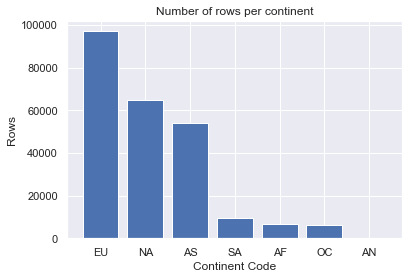

In [249]:
continents = df_with_continents['Continent'].value_counts()
plt.bar(continents._index, continents.values)
plt.xlabel('Continent Code')
plt.ylabel('Rows')
plt.title('Number of rows per continent')

Text(0.5, 1.0, 'Number of rows per South American Country')

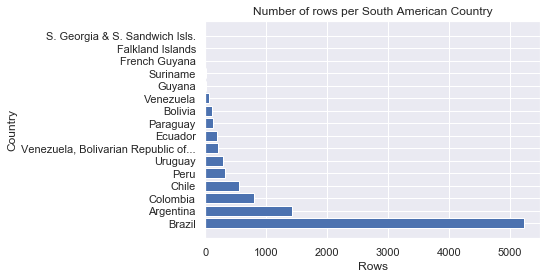

In [250]:
sa_countries = df_with_continents[df_with_continents['Continent'] == 'SA'].Country.value_counts()
plt.barh(sa_countries._index, sa_countries.values)
plt.xlabel('Rows')
plt.ylabel('Country')
plt.title('Number of rows per South American Country')

In [251]:
df_with_continents[df_with_continents['Continent'] == 'SA'].Country.value_counts()

Brazil                                  5230
Argentina                               1419
Colombia                                 801
Chile                                    555
Peru                                     323
Uruguay                                  291
Venezuela, Bolivarian Republic of...     211
Ecuador                                  183
Paraguay                                 123
Bolivia                                  103
Venezuela                                 59
Guyana                                     9
Suriname                                   4
French Guyana                              1
Falkland Islands                           1
S. Georgia & S. Sandwich Isls.             1
Name: Country, dtype: int64

### Gender breakdown

### Average age at which a developer starts coding

### Top 3 most popular programming languages

### Top 3 roles with the highest salary